# Рунге, часть 3.2

In [21]:
import math
from tqdm import tqdm, tqdm_notebook
size = 2   # количество функций

In [22]:
# начальные данные

Nu = 1e-6
ro = 1000.0
C_snd = 1260.0

d = 0.05
l = 2

S = math.pi * d ** 2 / 4
V = l * S

E_s = ro * C_snd ** 2
C = V / E_s * 1000

alpha = 1 / 4
ksi = 1 - math.cos(math.pi * alpha)
B = math.sqrt(ksi / 2 / ro) / l
F = S * math.sqrt(2 / ro)
r2 = ro * ksi / 2 / S / S


p_atm = 1e+5
q = 1e-3

In [23]:
sign = lambda x: x and (1, -1)[x<0]
sign(-5), sign(5), sign(0)

(-1, 1, 0)

In [24]:
def fun2(t, y, q_delta):    # t, y = const
    # q_delta = разность q
    k = q_delta / C
    return k

In [25]:
def fun3(t, q, p_delta): # p_delta - разность p
    q_next = B * math.sqrt(abs(p_delta)) * (F * math.sqrt(abs(p_delta) / ksi) * sign(p_delta) - q)
    return q_next

In [26]:
def fun(q):
    return r2 * abs(q) ** 2 * sign(q)

In [27]:
def Runge(t, y, h):  # t - значение узла, y - значения в точке t
    # коэффициенты Рунге
    k = [[0] for _ in range(4)]
    # значения 2-ух функций на следующем узле
    y_result = [0] * size
    # копия в текущем узле (для перемен)
    # y_local[0] = p, y_local[1] = q2
    y_local = y.copy()

    # p: fun2(t, y, q_delta

    q_delta = q - y_local[1]
    k[0] = fun2(t, y_local[0], q_delta)
    k[1] = fun2(t + h / 2, y_local[0] + h * k[0] / 2, q_delta)
    k[2] = fun2(t + h / 2, y_local[0] + h * k[1] / 2, q_delta)
    k[3] = fun2(t + h, y_local[0] + h * k[2], q_delta)
    kn = (k[0] + 2 * k[1] + 2 * k[2] + k[3]) / 6
    # новое значение p
    y_result[0] = y_local[0] + h * kn
    y_local[0] += h * kn

    # q: fun3(t, q, p_delta)
    p_delta = y_local[0] - p_atm
    k[0] = fun3(t, y_local[1], p_delta)
    k[1] = fun3(t + h / 2, y_local[1] + h * k[0] / 2, p_delta)
    k[2] = fun3(t + h / 2, y_local[1] + h * k[1] / 2, p_delta)
    k[3] = fun3(t + h, y_local[1] + h * k[2], p_delta)
    kn = (k[0] + 2 * k[1] + 2 * k[2] + k[3]) / 6
    # новое значение q
    y_result[1] = y_local[1] + h * kn
    y_local[1] += h * kn

    return y_result

In [28]:
def hydraulic(t_min, t_max, count):
    h = (t_max - t_min) / count
    t = [(t_max - t_min) * i / count for i in range(count + 1)]

    # моделируем не с начала
   # result = [[p_atm + 37, 1e-3]]
    result = [[p_atm, 0]]

    for i in tqdm(range(count), position=0, leave=True):
        result.append(Runge(t[i], result[i], h))

    return result, t, h

In [29]:
tmin = 0
tmax = 20000
count = 1000000
count2 = 2000000
count3 = 4000000

In [30]:
result, t, h = hydraulic(tmin, tmax, count)
result2, t2, h2 = hydraulic(tmin, tmax, count2)
result3, t3, h3 = hydraulic(tmin, tmax, count3)

100%|█████████████████████████████████████████████████████████████████████| 4000000/4000000 [01:32<00:00, 43268.77it/s]


In [31]:
from matplotlib import pyplot as plt
%matplotlib inline

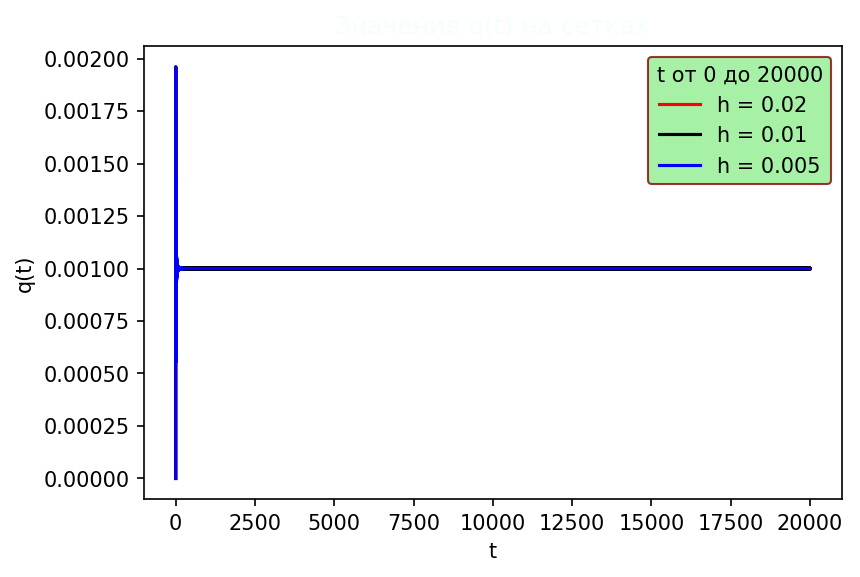

In [32]:
plt.subplots(dpi=150)
plt.title("Значения q(t) на сетках", color='mintcream')
plt.xlabel("t")
plt.ylabel("q(t)")
plt.plot(t, [result[i][1] for i in range(count + 1)], label='h = ' + str(h), color='r')
plt.plot(t2, [result2[i][1] for i in range(count2 + 1)], label='h = ' + str(h2), color='k')
plt.plot(t3, [result3[i][1] for i in range(count3 + 1)], label='h = ' + str(h3), color='b')
plt.legend(facecolor='lightgreen', edgecolor='darkred', title="t от " + str(tmin) + " до " + str(tmax))

In [33]:
for i in range(count3 - 20, count3):
    print(result3[i][0], "\t", result3[i][1])

100037.98564814212 	 0.0010000000000000024
100037.98564814212 	 0.0010000000000000024
100037.98564814212 	 0.0010000000000000024
100037.98564814212 	 0.0010000000000000024
100037.98564814212 	 0.0010000000000000024
100037.98564814212 	 0.0010000000000000024
100037.98564814212 	 0.0010000000000000024
100037.98564814212 	 0.0010000000000000024
100037.98564814212 	 0.0010000000000000024
100037.98564814212 	 0.0010000000000000024
100037.98564814212 	 0.0010000000000000024
100037.98564814212 	 0.0010000000000000024
100037.98564814212 	 0.0010000000000000024
100037.98564814212 	 0.0010000000000000024
100037.98564814212 	 0.0010000000000000024
100037.98564814212 	 0.0010000000000000024
100037.98564814212 	 0.0010000000000000024
100037.98564814212 	 0.0010000000000000024
100037.98564814212 	 0.0010000000000000024
100037.98564814212 	 0.0010000000000000024


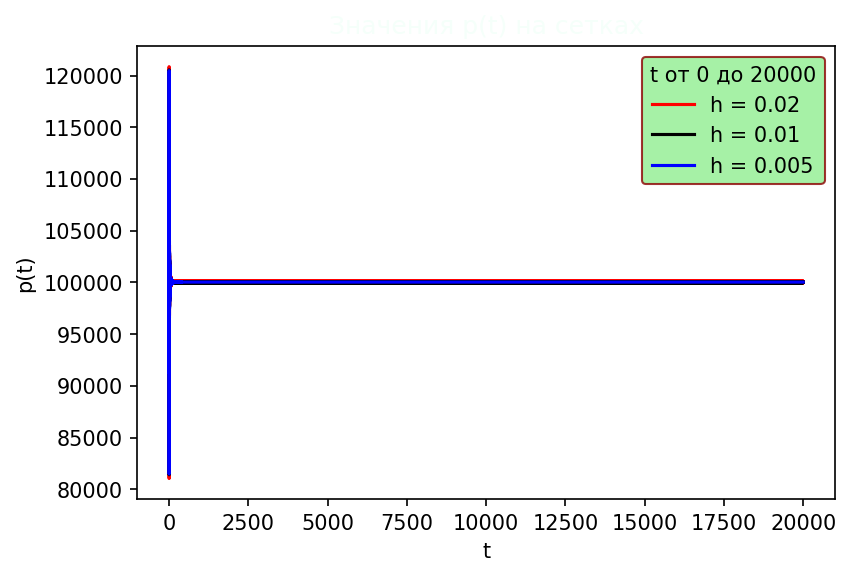

In [37]:
plt.subplots(dpi=150)
plt.title("Значения p(t) на сетках", color='mintcream')
plt.xlabel("t")
plt.ylabel("p(t)")
plt.plot(t, [result[i][0] for i in range(count + 1)], label='h = ' + str(h), color='r')
plt.plot(t2, [result2[i][0] for i in range(count2 + 1)], label='h = ' + str(h2), color='k')
plt.plot(t3, [result3[i][0] for i in range(count3 + 1)], label='h = ' + str(h3), color='b')
plt.legend(facecolor='lightgreen', edgecolor='darkred', title="t от " + str(tmin) + " до " + str(tmax))